In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pymc3 as pm

coeff_0 3
coeff_1 77
coeff_2 91
coeff_3 14
coeff_4 30
coeff_5 50
coeff_6 65
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x_coeff_6, x_coeff_5, x_coeff_4, x_coeff_3, x_coeff_2, x_coeff_1, x_coeff_0, Intercept, sigma]


&lt;IPython.core.display.HTML object&gt;

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 143 seconds.
The acceptance probability does not match the target. It is 0.9978527473603085, but should be close to 0.95. Try to increase the number of tuning steps.
Predictions
Intercept 	 58.4988435062135
x_coeff_0 	 2.9990081361576304
x_coeff_1 	 77.0016821553473
x_coeff_2 	 90.99807096007864
x_coeff_3 	 13.998210591308874
x_coeff_4 	 29.99964259533962
x_coeff_5 	 49.99782216790205
x_coeff_6 	 64.99928750693434
sigma 	 0.1972091137512232


&lt;Figure size 504x504 with 0 Axes&gt;

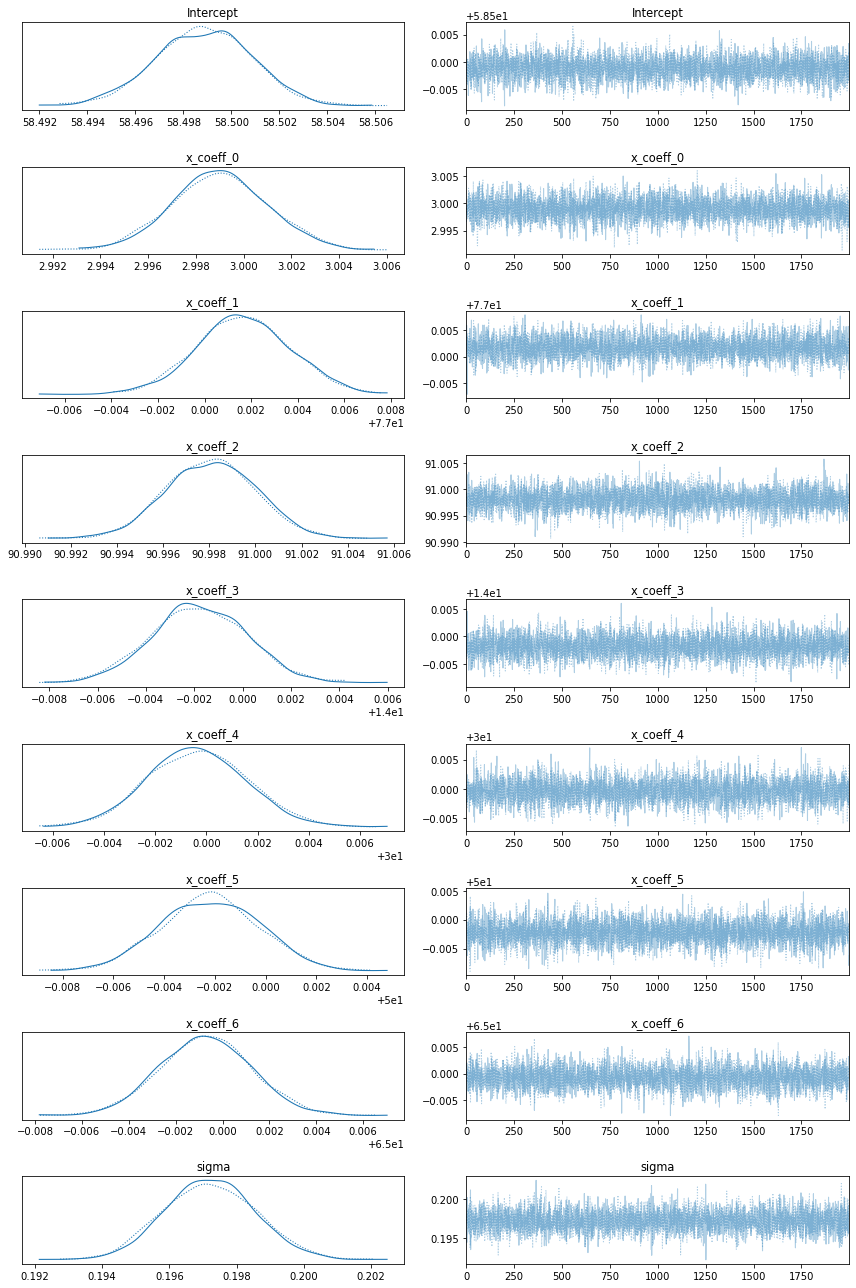

In [30]:
n_samples = 10000
X_dummy = np.random.randn(n_samples,7)
coeffs = np.random.randint(0,100, 7)
Y_dummy = np.random.randn(n_samples)*0.2 + 58.5
for i in range(7):
    print('coeff_'+str(i), coeffs[i])
    Y_dummy += coeffs[i]*X_dummy[:,i]

with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfNormal('sigma', sigma=10)
    intercept = pm.Normal('Intercept', 0, sigma=20)

    mu = intercept
    
    for i in range(7):
        x_coeff = pm.Normal('x_coeff_'+str(i), 0, sigma=20)
        mu += X_dummy[:,i] * x_coeff

    # Define likelihood
    likelihood = pm.Normal('y', mu=mu , sigma=sigma, observed=Y_dummy)

    # Inference!
    trace = pm.sample(draws=2000, target_accept=0.95, max_treedepth=100, cores=2)

print('Predictions')
for x in trace.varnames[1:]:    
    print(x,'\t', np.mean(trace.get_values(x)))

fig = plt.figure(figsize=(7, 7))
for ax in fig.axes:
    ax.ticklabel_format(useOffset=False, style='plain')
pm.traceplot(trace)
plt.tight_layout()

In [38]:
n_samples = 10000
X_dummy = np.random.randn(n_samples,7)
coeffs = np.random.randint(0,100, 7)
Y_dummy = 58.5
for i in range(7):
    print('coeff_'+str(i), coeffs[i])
    Y_dummy += coeffs[i]*X_dummy[:,i]

Y_dummy = Y_dummy * np.random.randn(Y_dummy.shape[0])

with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfNormal('sigma', sigma=10)
    intercept = pm.Normal('Intercept', 0, sigma=20)

    mu = intercept
    
    for i in range(7):
        x_coeff = pm.Normal('x_coeff_'+str(i), 0, sigma=20)
        mu += X_dummy[:,i] * x_coeff

    # Define likelihood
    likelihood = pm.Normal('y', mu=mu , sigma=sigma, observed=Y_dummy)

    # Inference!
    trace = pm.sample(draws=2000, target_accept=0.95, max_treedepth=100, cores=2)

print('Predictions')
for x in trace.varnames[1:]:    
    print(x,'\t', np.mean(trace.get_values(x)))

fig = plt.figure(figsize=(7, 7))
for ax in fig.axes:
    ax.ticklabel_format(useOffset=False, style='plain')
pm.traceplot(trace)
plt.tight_layout()


coeff_0 46
coeff_1 3
coeff_2 28
coeff_3 73
coeff_4 21
coeff_5 99
coeff_6 18
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x_coeff_6, x_coeff_5, x_coeff_4, x_coeff_3, x_coeff_2, x_coeff_1, x_coeff_0, Intercept, sigma]
